In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from implementations import * 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
# import some data to test the functions
from helpers import *

x, y, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(x)
tx = build_poly(x, 1)

y.shape, x.shape, tx.shape

((10000,), (10000,), (10000, 2))

(15.385887871354932, array([ 73.2938521 ,  13.47969958]))

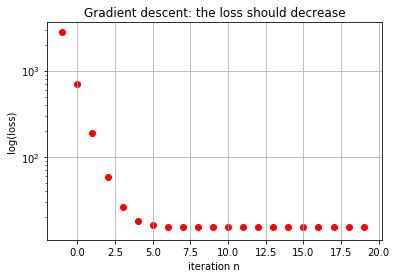

In [46]:
# gradient descent
initial_w = np.array([0, 0])
max_iters = 20
gamma = 0.5
loss, w = gradient_descent(y, tx, initial_w, max_iters, gamma, print_output=False, plot_losses=True)
loss,w

(28.987135068570332, array([ 78.04371263,  15.63423869]))

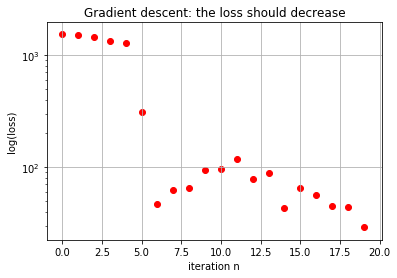

In [47]:
# stochastic gradient descent
# gradient descent
initial_w = np.array([0, 0])
max_iters = 20
gamma = 0.5
loss, w = gradient_descent(y, tx, initial_w, max_iters, gamma, batch_size=1, print_output=False, plot_losses=True)
loss,w

In [48]:
# analityc solution
least_squares(y, tx)

(15.3858878688294, array([ 73.293922  ,  13.47971243]))

In [49]:
# ridge regression to choose smaller weights (the simpler the model the better)
lambda_ = 0.02 # how to properly choose lambda?
ridge_regression(y, tx, lambda_)

(19.493655361271703, array([ 70.474925  ,  12.96126196]))

(88823.296494132577, array([ 0.25340497,  2.71506301, -7.40856042]))

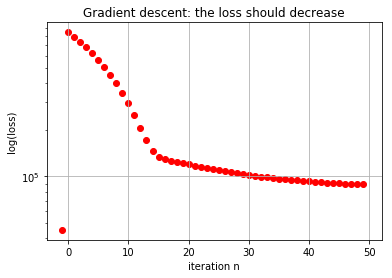

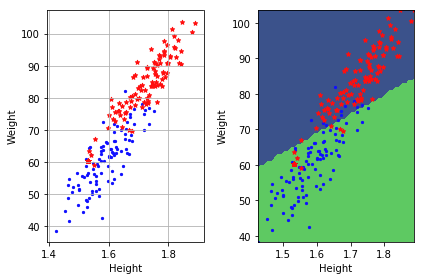

In [50]:
# logistic regression (it is gradient descent with a different loss function)
from helpers import sample_data, load_data
from plots import visualization

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

tx = build_poly(x, 1)
initial_w = np.ones(tx.shape[1])
max_iters = 50
gamma = 0.2
minloss, w = gradient_descent(y, tx, initial_w, max_iters, gamma, batch_size=-1, print_output=False, plot_losses=True, costfunc=CostFunction.PROB)
# w = np.array(w).reshape(-1, 1)
visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
minloss, w